In [1]:
!unzip /content/test.zip

Archive:  /content/test.zip
  inflating: test/closed eye g.jpg   
  inflating: test/closed eye g2.jpg  
  inflating: test/closed eye.jpg     
  inflating: test/download.jpg       
  inflating: test/o.jpg              
  inflating: test/op glasses m.jpg   
  inflating: test/op glasses w.jpg   


The person is opening his eyes


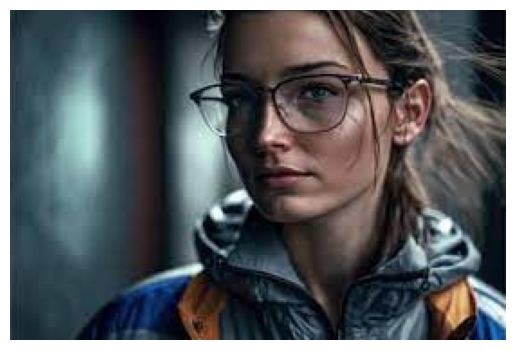

In [7]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

interpreter = tf.lite.Interpreter(model_path="/content/model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

image_path = '/content/test/op glasses w.jpg'
input_shape = input_details[0]['shape']

input_image = Image.open(image_path)
input_image = input_image.resize((input_shape[1], input_shape[2]))
input_image = np.array(input_image, dtype=np.float32)
input_image /= 255.0

input_image = np.expand_dims(input_image, axis=0)

interpreter.set_tensor(input_details[0]['index'], input_image)
interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])

predicted_class = np.argmax(output_data[0])

if predicted_class == 0:
    print("The person is opening his eyes")
else:
    print("The person is closeing his eyes")


plt.imshow(Image.open(image_path))
plt.axis('off')
plt.show()